In [1]:
import numpy as np
import math
import matplotlib.pyplot as plt
import os
import networkx as nx


from scipy.optimize import curve_fit
from config.sqlcollect import getTable
from config.network import graphCreation
from config.cubes import makeCubes
from config.seismicZones import query
from config.network import graphCreation3


from motifs_areas_volumes_energy import*


In [10]:
import warnings

# Does not show warning when seting balls size in scatterplot (sometimes warning)
warnings.filterwarnings("ignore", category=RuntimeWarning)


In [2]:
# ---------------------------SETUP AND COLLECTION OF QUAKES------------------------------------#
# Which region do you want to analyze ?
region = input('Input region : vrancea / romania / california / italy / japan : ')

# The side of the cubes that you split the region in 
#side = int(input('Input side of the cube split in km 5 / 10 / 20 : '))

# The condition for the SQL collection
sql_query= query(region)

# Magnitude windows for the condition that collects the database through mySQL
magMin = int(input('Input minimum magnitude: '))
magMax = int(input('Input maximum magnitude: '))
# Add to condition
sql_query+=f" AND magnitude>={magMin} AND magnitude<={magMax}"

#print(sql_query)

# Collect the earthquakes
quakes = getTable(sql_query)
quakes.head()

,datetime,latitude,longitude,depth,magnitude
0,1976-08-19 19:03:00.800,45.54,26.37,162.0,2.3
1,1976-09-07 17:38:08.200,45.62,26.50,155.3,3.6
2,1976-10-01 17:50:43.200,45.68,26.49,146.0,6.0
3,1977-03-04 19:21:54.100,45.77,26.76,94.0,7.4
4,1977-03-04 21:21:01.100,45.22,26.65,141.0,3.0


In [3]:
mapcoords={'minLat':min(quakes['latitude']),
            'maxLat':max(quakes['latitude']),
            'minLon':min(quakes['longitude']),
            'maxLon':max(quakes['longitude']),
            'minDepth':min(quakes['depth']),
            'maxDepth':max(quakes['depth'])
            }

In [4]:
print(mapcoords)


{'minLat': 45.2, 'maxLat': 46.0, 'minLon': 26.0, 'maxLon': 27.0, 'minDepth': 50.0, 'maxDepth': 196.0}


## VISUALIZATION

In [5]:
#import ipympl

from visualization import visualize

In [6]:
# ----------------------------------------------------------------------------------------------#

# ----------------------------------2D MAP PROJECTION----------------------------------------------#
# Choose if you wish to include a projection of the region's map as 2D image under the 3D scatterplot
# You require png images with the maps for this to" work
withMap = input('Do you wish the scatter to have a projection of the region map ? True / False : ')

<Figure size 1440x1440 with 0 Axes>

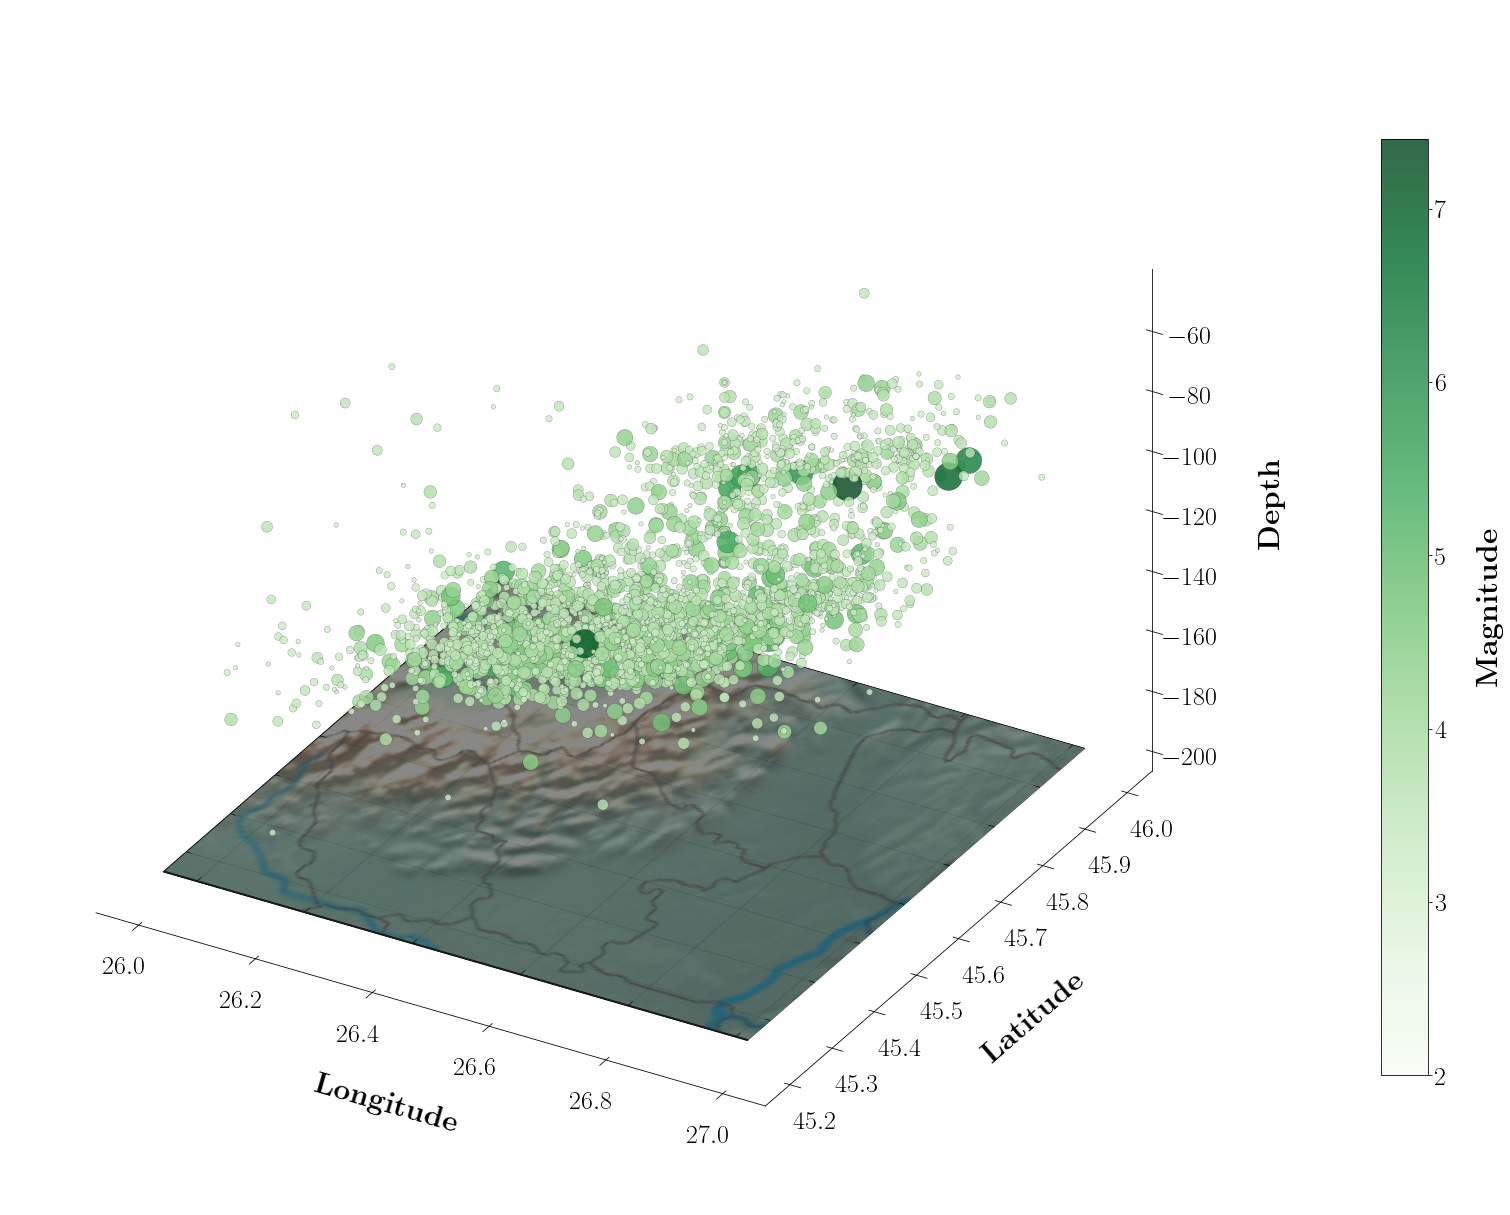

In [11]:
# %matplotlib widget

plt.figure(figsize=(20,20))
ax = visualize(quakes,region,withMap,mapcoords)



if not os.path.exists(f'./results/{region}/visualization'):
    os.makedirs(f'results/{region}/visualization')


if withMap == 'True':
    plt.savefig(f'./results/{region}/visualization/{region}_{magMin}mag_map.png',
                facecolor='white', transparent=False, bbox_inches = "tight" )
    #plt.savefig(f'./results/{region}/visualization/{region}_maptest.svg', bbox_inches = "tight" )
elif withMap == 'False':
    plt.savefig(f'./results/{region}/visualization/{region}_{magMin}mag_nomap.png',
                facecolor='white', transparent=False, bbox_inches = "tight")
    #plt.savefig(f'./results/{region}/visualization/{region}_nomaptest.svg', bbox_inches = "tight" )

## SPLIT REGION IN CUBES

In [13]:
quakes

,datetime,latitude,longitude,depth,magnitude
0,1976-08-19 19:03:00.800,45.5400,26.3700,162.0,2.3
1,1976-09-07 17:38:08.200,45.6200,26.5000,155.3,3.6
2,1976-10-01 17:50:43.200,45.6800,26.4900,146.0,6.0
3,1977-03-04 19:21:54.100,45.7700,26.7600,94.0,7.4
4,1977-03-04 21:21:01.100,45.2200,26.6500,141.0,3.0
...,...,...,...,...,...
7668,2022-03-30 06:48:34.830,45.5656,26.5115,130.9,3.0
7669,2022-03-30 10:09:49.660,45.5255,26.5076,112.3,2.7
7670,2022-03-30 18:53:08.850,45.7415,26.6735,135.4,2.8
7671,2022-03-30 19:19:42.570,45.5642,26.4690,113.1,3.1


In [14]:
quakes = makeCubes(quakes,region)
quakes.head()

,datetime,latitude,longitude,depth,magnitude,xLatitude,yLongitude,zDepth,cubeIndex,cubeLatitude,cubeLongitude,cubeDepth
0,1976-08-19 19:03:00.800,45.54,26.37,162.0,2.3,8,6,23,6055,45.5378,26.3481,162.5
1,1976-09-07 17:38:08.200,45.62,26.50,155.3,3.6,10,9,21,7822,45.6279,26.5380,152.5
2,1976-10-01 17:50:43.200,45.68,26.49,146.0,6.0,11,8,20,8633,45.6730,26.4747,147.5
3,1977-03-04 19:21:54.100,45.77,26.76,94.0,7.4,13,13,9,10449,45.7631,26.7911,92.5
4,1977-03-04 21:21:01.100,45.22,26.65,141.0,3.0,1,11,19,309,45.2225,26.6646,142.5


## NETWORK CREATION

In [15]:
quakesGraph = graphCreation(quakes)

nodes:  1692 
edges:  7423


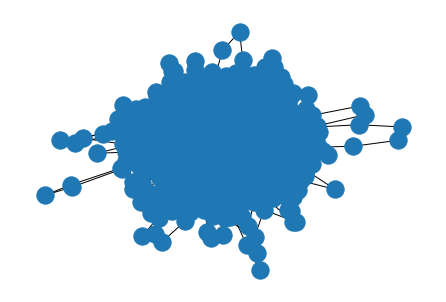

In [28]:
# A randomly drawn graph of the sesismic network.
# We will draw them using their real coordinates later
nx.draw(quakesGraph)
print("nodes: ", quakesGraph.number_of_nodes(), "\nedges: ", quakesGraph.number_of_edges())